In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import xgboost
import sys
sys.path.append("./skynet/bf/src/scripts/")
import xgboost_ohlc
import utils
import numpy as np
import seaborn as sns
import talib
import datetime
import requests
import time
%matplotlib inline

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 500)

#one = pd.read_csv('skynet/bf/data/processed/min.csv')
five = pd.read_csv('skynet/bf/data/processed/min_five.csv')
#hour = pd.read_csv('skynet/bf/data/processed/hour.csv')

In [6]:
five = pd.read_csv('skynet/bf/data/processed/min_five.csv')
#data_columns = pd.Series(five.columns).apply(lambda x: x if 'Target' not in x else np.NaN).dropna().values
data_columns = ['MACDS','UP','FirstUP','C/O','C-1/C','H/O','L/O']
target_column = 'Target_C/O'
backtest_columns = ['timestamp','Target_Close','Target_Open']

five_for_ml = five[data_columns+[target_column]+backtest_columns].dropna()
train = five_for_ml[-5000:-1000]
test = five_for_ml[-1000:]
backtest = five_for_ml[-1000:]
all_data = five_for_ml[-5000:]
print(five_for_ml['timestamp'].values[0])
print(five_for_ml['timestamp'].values[-1])


data_train = train[data_columns]
data_test = test[data_columns]


target_train = train[target_column]
target_test = test[target_column]


xgbr = xgboost_ohlc.r_fit(data_train, target_train)

predict = xgbr.predict(data_test)
p = predict >= 1.00000
result = p == (target_test.values >= 1.0000)
print(result.mean())

xgbr_all_data = xgboost_ohlc.r_fit(all_data[data_columns],all_data[target_column])

version = '1000'
train.to_csv("skynet/bf/model/T_"+version+"/train.csv")
test.to_csv("skynet/bf/model/T_"+version+"/test.csv")
backtest.to_csv("skynet/bf/model/T_"+version+"/backtest.csv")
pickle.dump(xgbr_all_data, open("skynet/bf/model/T_"+version+"/xgbr.pickle", "wb"))
with open("skynet/bf/model/T_"+version+"/spec.txt", mode="w") as txt:
    txt.write(str(datetime.datetime.now())+'\n')
    txt.write('data_columns: '+str(data_columns)+"\n")
    txt.write('target_column: '+str(target_column)+"\n")
    txt.write('simplescore: '+str(result.mean())+"\n")

1448918700.0
1603706400.0
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.754
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.3s finished


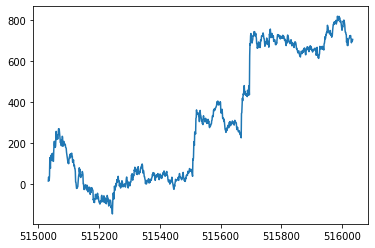

In [7]:
plt.plot((0.01*(p*2-1)*(backtest['Target_Close']-backtest['Target_Open'])).cumsum())

In [ ]:
#########################################
#########################################
#########################################